# Student Records


In [1]:
# Add any pre-requisites or libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [2]:
# Import the data
df = pd.read_csv("./data/student_records.csv", low_memory=False)

Some tips before analysis:
* markdown with summary content in the analysis will be labelled with 🔖.
* markdown with introduction content in the analysis will be labelled with 📍.

## Exploratory Data Analysis (EDA)

📍The process includes two aspects of content:
* understand the data, including basic information and summary statistics.
* clean the dataset
    - duplicated rows
    - missing values
    - extreme outliers
    - erroneous values

Drop the duplicate row firstly.

In [3]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(4424, 37)
(4424, 37)


🔖 There are not duplicated rows in the dataset.

In [4]:
# check the columns
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
# check the first five rows
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
# the basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
# check the nan value further
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

🔖 There are no missing value in the dataset, which means that the dataset is so clean. In addition, it seems that all features are preprocessed before. All categorical variables are processed to numbers excepet for 'target'. However, there are some places that can be improved further:
1. 'Nacionality' column has some wrong with name. It should be 'Nationality' instead.
2. 'Target' column should be processed to numerical labels.

In [8]:
# rename the 'Nacionality' column
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [9]:
# check the value of 'Trget' column
print(df['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


There are three different values in 'Target' column. And we encode them as follow:
* Dropout = 0
* Enrolled = 1
* Graduate = 2

In [10]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


Now, we should get familiar with this data. Let's start to explore its distribution.

In [11]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

🔖 According to the information above, we can identify the type of variable. They can be grouped into two categories as follow:
<table border="1">
    <style>
        td {
            text-align: center;
        }
    </style>
    <thead>
        <tr>
            <th style="text-align: center">type</th>
            <th style="text-align: center">variable</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan="18">Categorical</td>
            <td>Marital status</td>
        </tr>
        <tr>
            <td>Application mode</td>
        </tr>
        <tr>
            <td>Application order</td>
        </tr>
        <tr>
            <td>Course</td>
        </tr>
        <tr>
            <td>Daytime/evening attendance</td>
        </tr>
        <tr>
            <td>Previous qualification</td>
        </tr>
        <tr>
            <td>Nationality</td>
        </tr>
        <tr>
            <td>Mother's qualification</td>
        </tr>
        <tr>
            <td>Father's qualification</td>
        </tr>
        <tr>
            <td>Mother's occupation</td>
        </tr>
        <tr>
            <td>Father's occupation</td>
        </tr>
        <tr>
            <td>Displaced</td>
        </tr>
        <tr>
            <td>Educational special needs</td>
        </tr>
        <tr>
            <td>Debtor</td>
        </tr>
        <tr>
            <td>Tuition fees up to date</td>
        </tr>
        <tr>
            <td>Gender</td>
        </tr>
        <tr>
            <td>Scholarship holder</td>
        </tr>
        <tr>
            <td>International</td>
        </tr>
        <tr>
            <td rowspan="18">Quantitative</td>
            <td>Previous qualification (grade)</td>
        </tr>
        <tr>
            <td>Admission grade</td>
        </tr>
        <tr>
            <td>Age at enrollment</td>
        </tr>
        <tr>
            <td>Curricular units 1st sem (credited)</td>
        </tr>
        <tr>
            <td>Curricular units 1st sem (enrolled)</td>
        </tr>
        <tr>
            <td>Curricular units 1st sem (evaluations)</td>
        </tr>
        <tr>
            <td>Curricular units 1st sem (approved)</td>
        </tr>
        <tr>
            <td>Curricular units 1st sem (grade)</td>
        </tr>
        <tr>
            <td>Curricular units 1st sem (without evaluations)</td>
        </tr>
        <tr>
            <td>Curricular units 2nd sem (credited)</td>
        </tr>
        <tr>
            <td>Curricular units 2nd sem (enrolled)</td>
        </tr>
        <tr>
            <td>Curricular units 2nd sem (evaluations)</td>
        </tr>
        <tr>
            <td>Curricular units 2nd sem (approved)</td>
        </tr>
        <tr>
            <td>Curricular units 2nd sem (grade)</td>
        </tr>
        <tr>
            <td>Curricular units 2nd sem (without evaluations)</td>
        </tr>
        <tr>
            <td>Unemployment rate</td>
        </tr>
        <tr>
            <td>Inflation rate</td>
        </tr>
        <tr>
            <td>GDP</td>
        </tr>
        <tr>
            <td rowspan="1">Target</td>
            <td>Target</td>
        </tr>
    </tbody>
</table>


In [12]:
# list of categorical columns
cat_cols = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance\t', 'Previous qualification', 'Nationality',
    'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
    'Father\'s occupation', 'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International',
    'Target'
]
print(len(cat_cols))

# check the categorical value and its quantity
for col in cat_cols:
    print(df[str(col)].value_counts())
    print('-' * 50)

19
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
--------------------------------------------------
Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
--------------------------------------------------
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
--------------------------------------------------
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
--------------------------------------------------
Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64
---------------

18


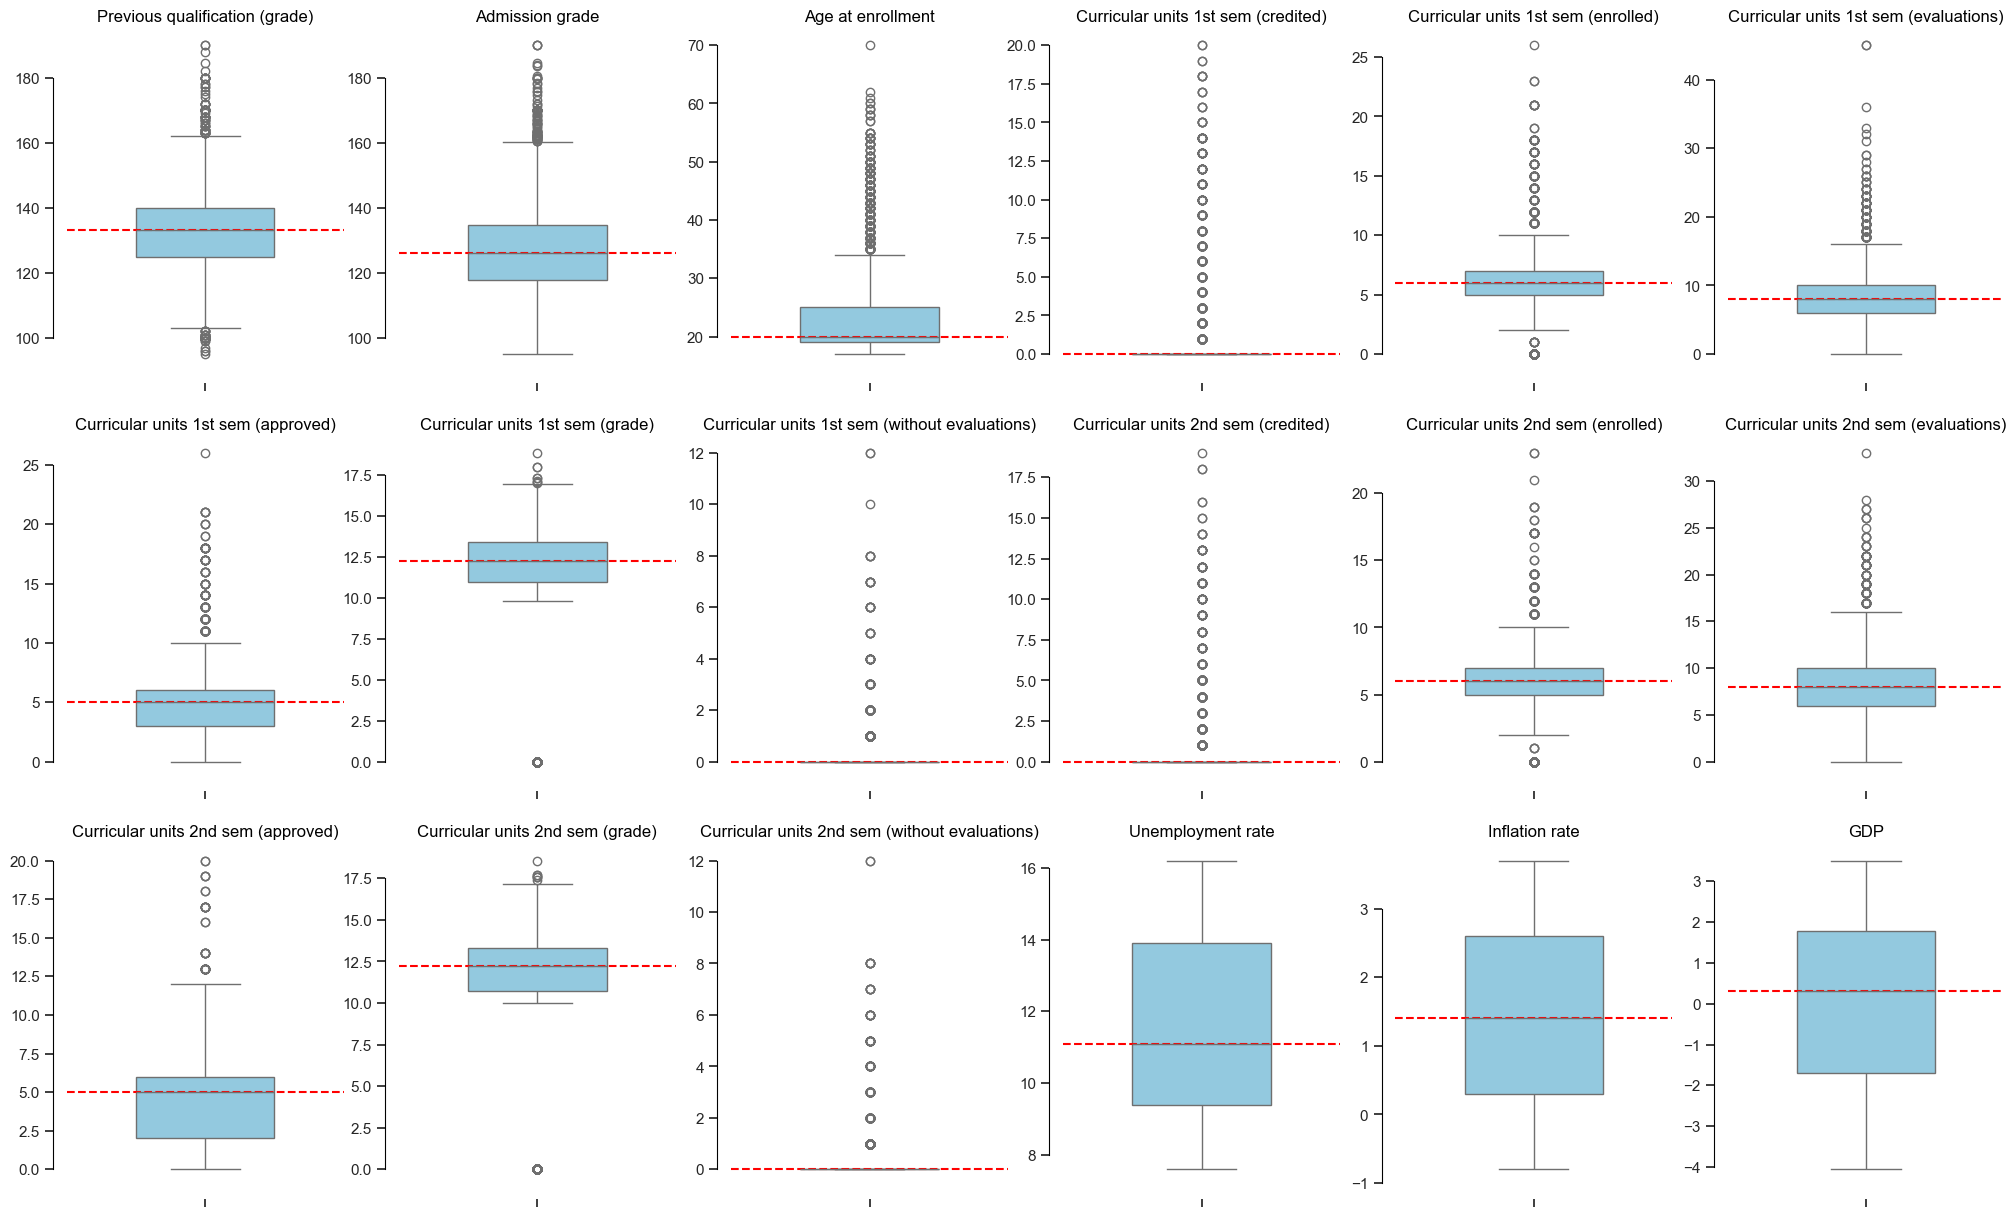

In [13]:
# list of numeric columns
num_cols = [
    'Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
print(len(num_cols))

# plot the distribution of numeric values
plt.figure(figsize=(25, 15))

for i, col in enumerate(num_cols):
    plt.subplot(3, 6, i+1)  # adjust the subplot grid as per the number of plots
    sns.boxplot(y=df[col], showfliers=True, color='skyblue', width=0.5)
    plt.yticks(fontsize=12)
    plt.axhline(df[col].median(), linestyle='--', color='red', linewidth=1.5)  # Add median line
    plt.title(col, fontsize=12)
    plt.ylabel('')

sns.set_theme(context='notebook', style='whitegrid')
sns.despine(offset=10, trim=True)
plt.show()

🔖 The dataset are 4424*37. \
Summary of the dataset: \
The dataset presents 4424 students' records, which profiles information such as their academic status and personal background from the time of admission to graduation. It provides important information support for researchers to study the growth path of students and predict their academic performance. The features of each student in the dataset can be summarized as follow:

* `Demographic Variables:` It includes the student's marital status, nationality, gender, international, and age. From the graphs above, we can see that the majority of students are single, Portuguese, female and their age ranges from 18 to 26 years old.

* `Study Habit:` It includes application mode, application order, course, daytime/evening attendance, displaced. From the graphs above, we can see that most students are general contingent and put the school first and have lesson in the daytime.

* `Academic Performance:` It mainly includes previous qualification, scholarship holder, admission grade and every index in the first and second semester, which describes information on student's learning.

* `Micro-economic Factors:` It includes qualification and occupation of the parent, debtor, tution fees. We can see that most students parents are unskilled workers.

* `Macro-economic Factors:` It includes unemployment rate, inflation rate, and GDP. We can learn about the social economic environment in which students live.

However, there is one more confusion to be explored. I want to know whether macro-economic factors are indicators of the country in which the student lives or other places. Now we find the answer in the following analysis.

In [14]:
# group the dataframe by nationality
grouped_by_nationality = df.groupby('Nationality')

# traverse the every nationality and check macro-economic factors
for nationality, group in grouped_by_nationality:
    print(f"Nationality: {nationality}")
    print(f"Number of students: {len(group)}")
    print(f"GDP: Are all GDP values the same? {group['GDP'].nunique() == 1}")
    print(f"Unemployment rate: Are all unemployment rates the same? {group['Unemployment rate'].nunique() == 1}")
    print(f"Inflation rate: Are all inflation rates the same? {group['Inflation rate'].nunique() == 1}")
    print()

Nationality: 1
Number of students: 4314
GDP: Are all GDP values the same? False
Unemployment rate: Are all unemployment rates the same? False
Inflation rate: Are all inflation rates the same? False

Nationality: 2
Number of students: 2
GDP: Are all GDP values the same? False
Unemployment rate: Are all unemployment rates the same? False
Inflation rate: Are all inflation rates the same? False

Nationality: 6
Number of students: 13
GDP: Are all GDP values the same? False
Unemployment rate: Are all unemployment rates the same? False
Inflation rate: Are all inflation rates the same? False

Nationality: 11
Number of students: 3
GDP: Are all GDP values the same? False
Unemployment rate: Are all unemployment rates the same? False
Inflation rate: Are all inflation rates the same? False

Nationality: 13
Number of students: 1
GDP: Are all GDP values the same? True
Unemployment rate: Are all unemployment rates the same? True
Inflation rate: Are all inflation rates the same? True

Nationality: 14
N

🔖 From the above information, we know that the macro-economic indicators are not specific to the student's country. These indicators may belong to the economic indicators of the place where the student is from such as province or city. But we have no way to get the accurate answer now.

## Data Mining
📍 From the purpose that the dataset was created, we know that it is used for researching reduction of academic dropout and failure in higher education. To explore this problem, the next analysis will begin from the perspective of **school administrators** or **education departments** to identify the factors that lead to the dropout and failure of students. There are two aspects of content:
1. explore factors that affect the graduation of students
2. predict the graduation of students according to the factors

#### 1. Factors that affect the graduation of students

c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\admin\.conda\envs\gpu_torch\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


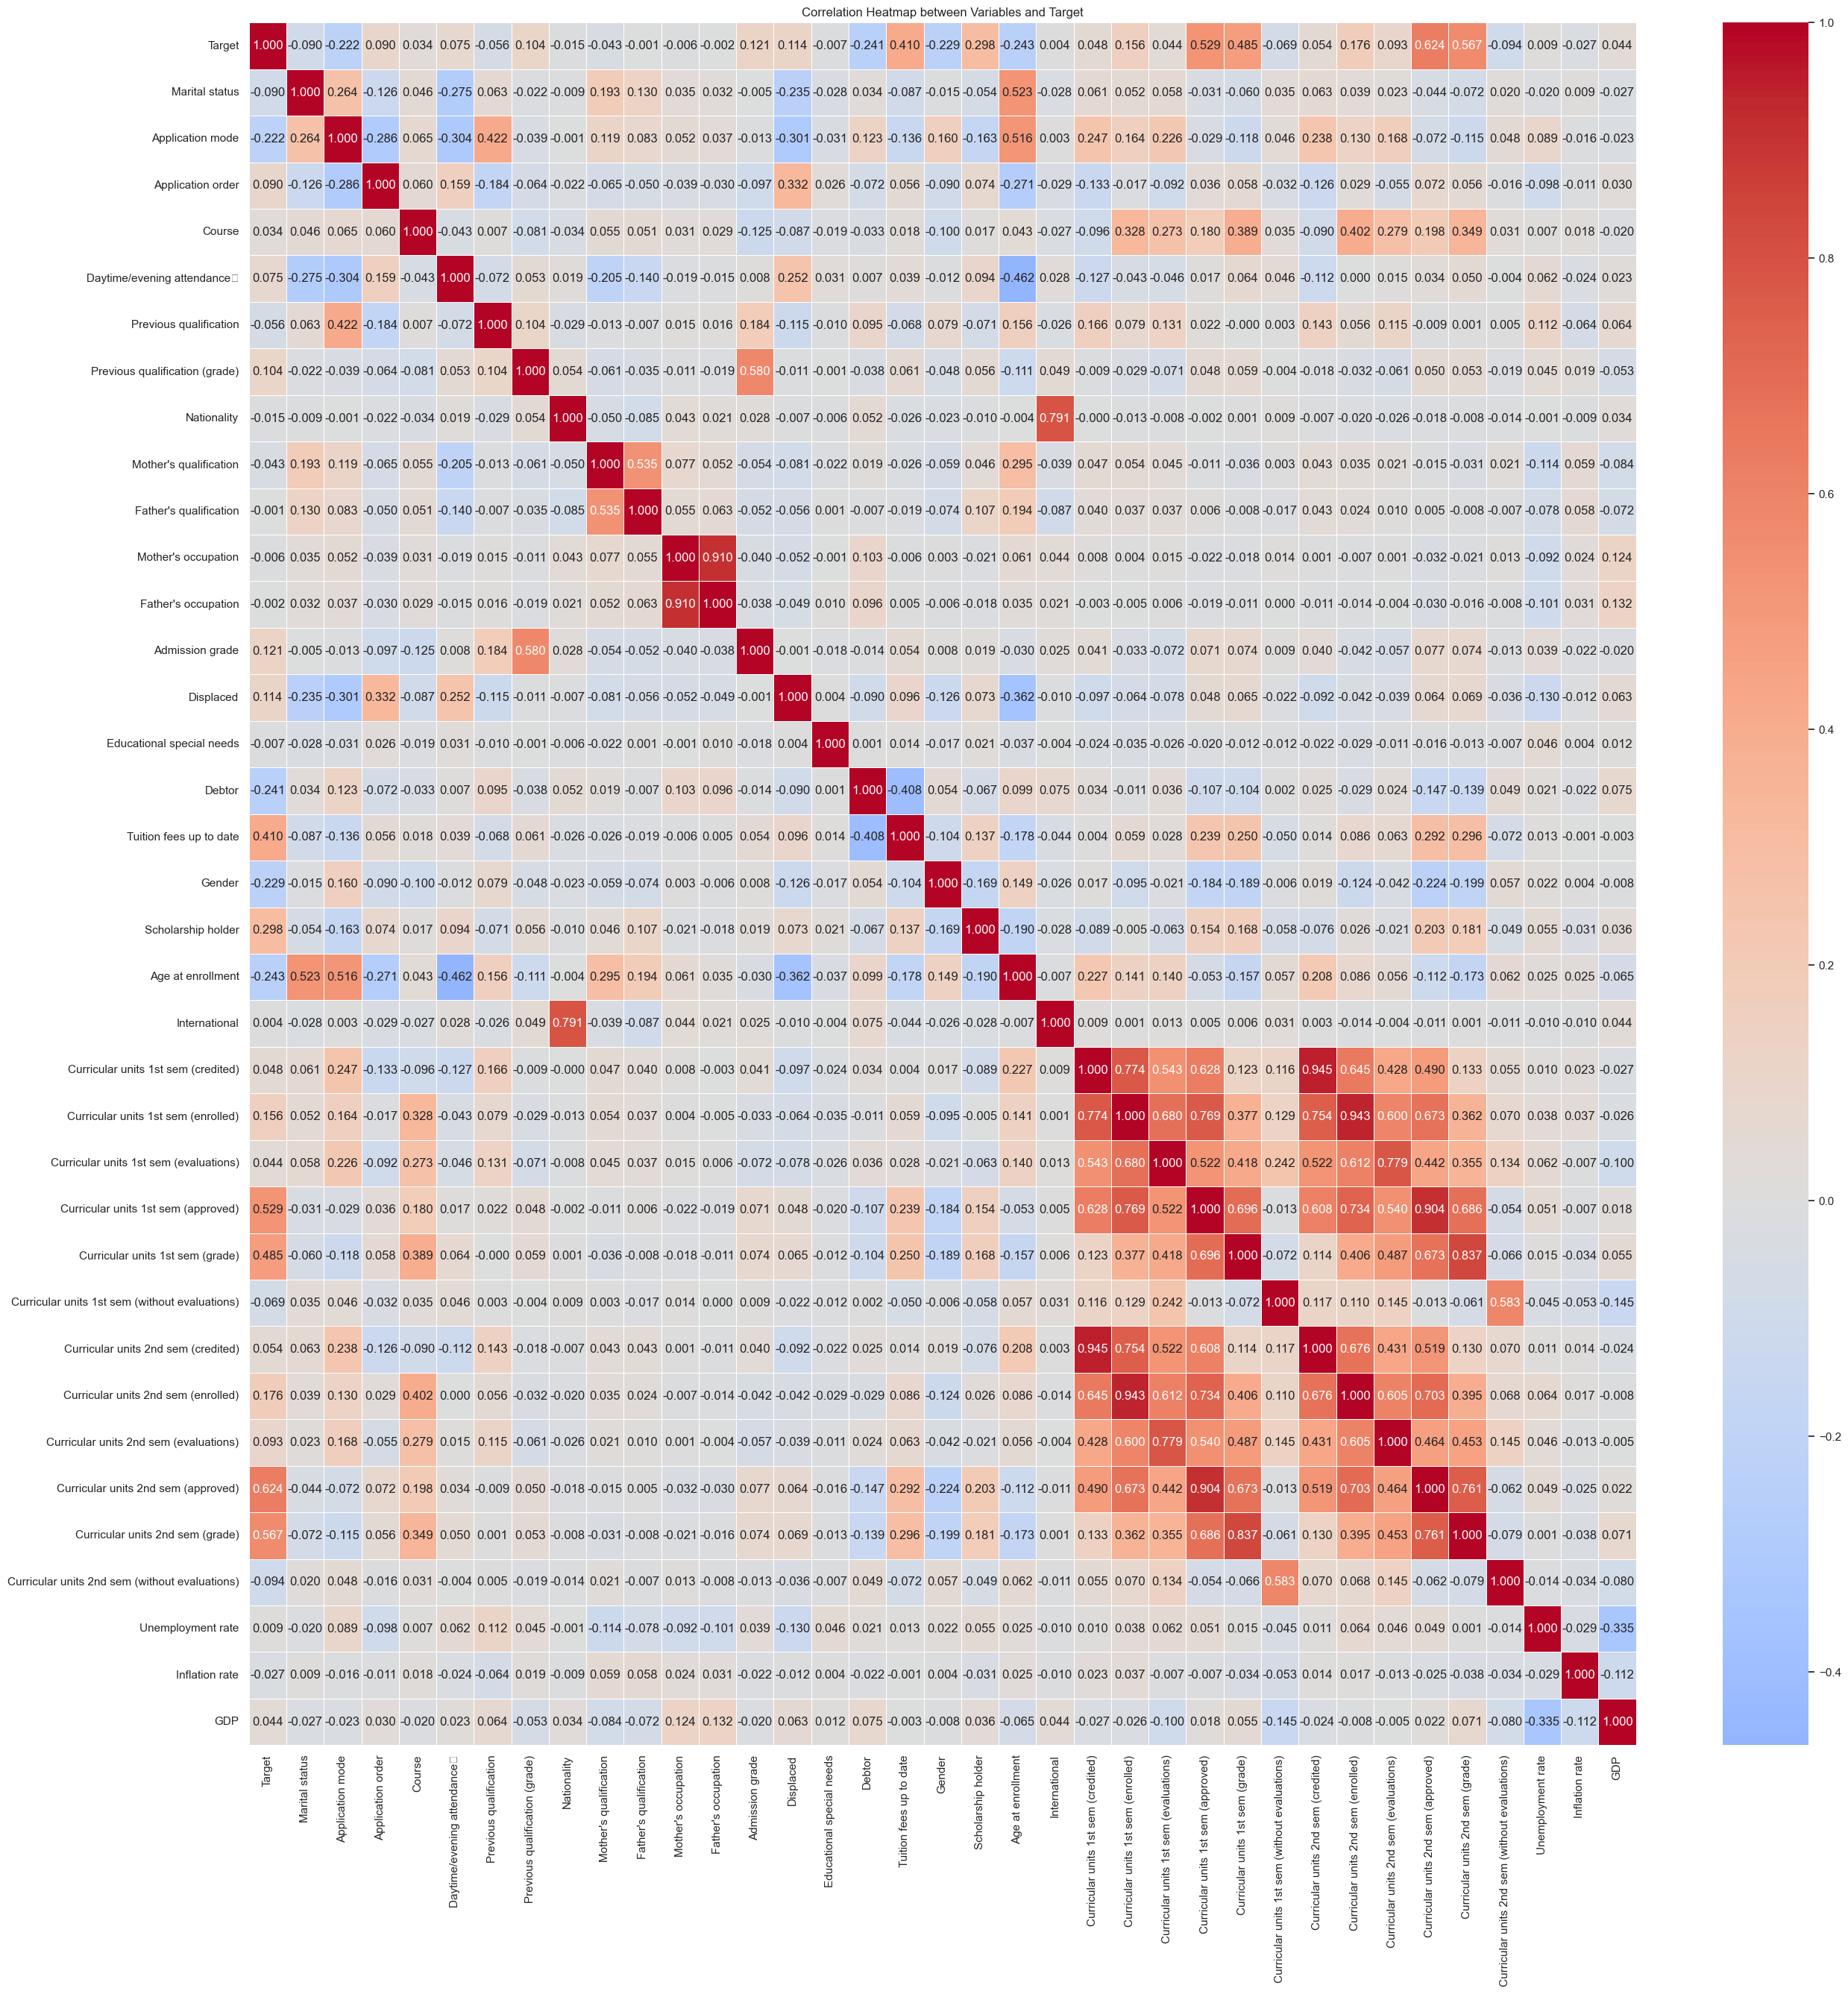

In [15]:
# move the 'target' column to the first position
target_column = df.pop('Target')
df.insert(0, 'Target', target_column)

# calculate the correlation matrix
corr_matrix = df.corr()

# plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.3f')
plt.title('Correlation Heatmap between Variables and Target')
plt.show()

🔖 Some key points about heatmap:
* **Demographic Variables**:
Variables such as Marital status, Nationality, Gender, International, and Age at enrollment show low correlations with the target. This suggests that demographic factors alone are not strong predictors of whether a student will graduate, enroll, or drop out.

* **Study Habit**:
Variables such as Application mode, Application order, Course, Daytime/evening attendance, and Displaced also exhibit low correlations with the target.
This indicates that how and when students apply or attend classes does not have a significant direct linear impact on their graduation status.

* **Academic Performance**:
Previous qualification, Previous qualification (grade), Admission grade, and variables related to curricular units (e.g., credited, enrolled, evaluations, approved, and grade for both 1st and 2nd semesters) show moderate correlations with the target. Specifically, Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) have higher correlations with the target, suggesting that students' academic performance, as measured by their grades, is a more significant predictor of their graduation status. Scholarship holder also shows a slightly positive correlation with the target, implying that receiving a scholarship might positively influence a student's likelihood of graduating.

* **Micro-economic Factors**:
Variables such as Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Debtor, and Tuition fees up to date have low correlations with the target. This indicates that parental background and financial factors do not have a strong direct linear relationship with the students' graduation status.

* **Macro-economic Factors**:
Economic indicators such as Unemployment rate, Inflation rate, and GDP show very low correlations with the target. This suggests that the broader economic environment has little to no direct impact on individual students' likelihood of graduating, enrolling, or dropping out.

Overall, it can be found that only academic performance show moderate correlation with the target. However, we cannot ignore the effect of correlation between variables on target based on their possible practical significance. So we only remove variables with a correlation coefficient below 0.05 to simplify the data.

In [16]:
# select the correlation values with the 'target' column
target_corr = corr_matrix["Target"]

# find the variables with correlation coefficient less than 0.05
low_corr_vars = target_corr[abs(target_corr) < 0.05]

# print these variables with their corresponding correlation values
print("Variables with correlation coefficient less than 0.05 with the target variable:")
for var, corr_value in low_corr_vars.items():
    print(f"{var}: {corr_value:.3f}")

Variables with correlation coefficient less than 0.05 with the target variable:
Course: 0.034
Nationality: -0.015
Mother's qualification: -0.043
Father's qualification: -0.001
Mother's occupation: -0.006
Father's occupation: -0.002
Educational special needs: -0.007
International: 0.004
Curricular units 1st sem (credited): 0.048
Curricular units 1st sem (evaluations): 0.044
Unemployment rate: 0.009
Inflation rate: -0.027
GDP: 0.044


#### 2. Predict student's graduation status
📍Now, we use machine learning technique to predict student's graduation status based on the features whose correlation cofficient are more than 0.05.

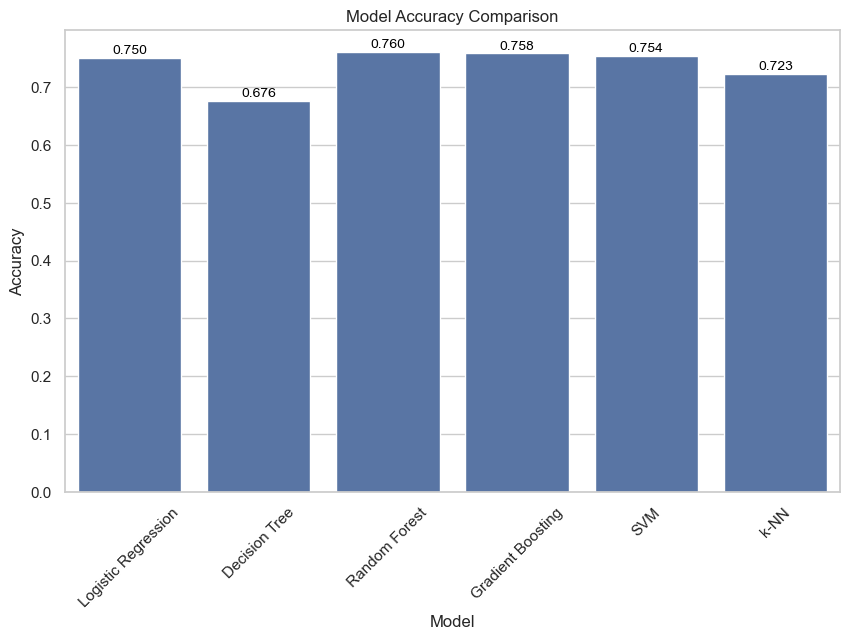

In [17]:
# find variables with correlation coefficient greater than or equal to 0.05
high_corr_vars = target_corr[abs(target_corr) >= 0.05].index

# create a new dataFrame with selected features
df_selected = df[high_corr_vars]

# split the data
X = df_selected.drop(columns=['Target'])
y = df_selected['Target']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# record model names and accuracies
model_names = []
accuracies = []

# train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)

# create a dataFrame containing model names and accuracies
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies
})

# plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# add accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

🔖 Random Forest get the highest accuracy with 0.760 among these classifers. So we focus on it in the next analysis.

In [18]:
# get the predicted value of Random Forest
y_pred = models["Random Forest"].predict(X_test_scaled)

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       316
           1       0.49      0.30      0.37       151
           2       0.77      0.93      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



🔖 From the classification report, we can find that the Random Forest model shows strong performance for predicting classes 0 and 2, with high precision, recall, and F1-scores. Specifically, class 0 (dropout) has a precision of 83%, recall of 76%, and an F1-score of 0.80, while class 2 (graduate) has a precision of 77%, recall of 93%, and an F1-score of 0.84. However, the model struggles with class 1 (enrolled), achieving only a 49% precision, 30% recall, and an F1-score of 0.37. Overall, the model has an accuracy of 76.0%, with a macro average F1-score of 0.67 and a weighted average F1-score of 0.74. The primary area for improvement is the prediction performance for class 1.

Next we try to fine-tune the Random Forest model using GridSearchCV.

In [19]:
# define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# initialize the model
rf = RandomForestClassifier(random_state=42)

# initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# fit the model
grid_search.fit(X_train_scaled, y_train)

# get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


Accuracy: 0.777
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       316
           1       0.54      0.33      0.41       151
           2       0.78      0.94      0.85       418

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



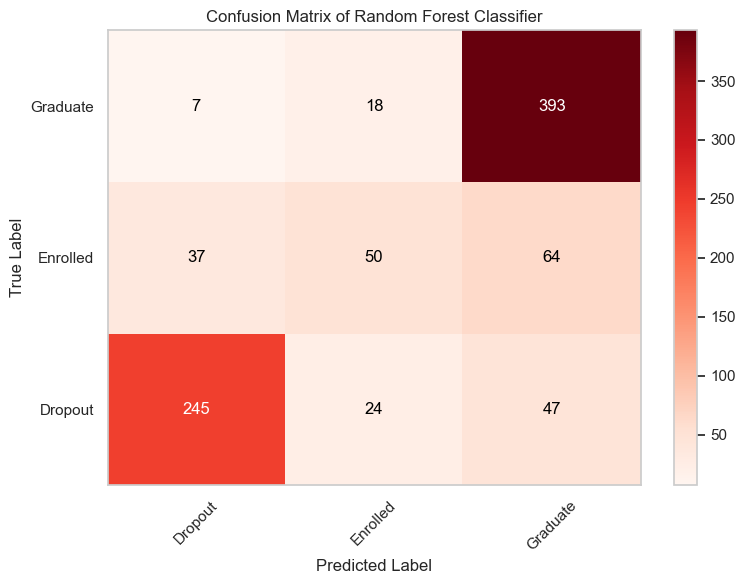

In [20]:
# train Random Forest with the optimal parameters
rf = RandomForestClassifier(
    bootstrap=False, 
    max_depth=None, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=5, 
    n_estimators=300, 
    random_state=42
)
rf.fit(X_train_scaled, y_train)

# get the predicted values
y_pred = rf.predict(X_test_scaled)

# print the classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

# produce confusion matrix
labels = [0, 1, 2]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# plot heatmap (there is something wrong with my seaborn, so matplotlib is used here)
plt.figure(figsize=(8, 6))
plt.pcolor(conf_matrix, cmap='Reds', edgecolors='none')

# add title and colorbar
plt.title('Confusion Matrix of Random Forest Classifier')
plt.colorbar()

# add labels
labels = ['Dropout', 'Enrolled', 'Graduate']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks + 0.5, labels, rotation=45)
plt.yticks(tick_marks + 0.5, labels)

# add text annotations
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j + 0.5, i + 0.5, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             verticalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

🔖 According to the above result, we can see that the accuracy has increased by one percentage point. In particular, the prediction of graduates achieve 94% accuracy. And accuracy of 78% is acquired in dropout prediction. However, the prediction of enrolled students is still not meet the expectation. The main reason is that the number of enrolled students is relatively small compared with graduate and dropout. \
The model can predict the dropout students well, which is basically in line with the purpose of the study. In the future, the sample number of enrolled students can be increased to improve the effect of the model. 

#### 3. Exploration of removed factors

📍 We deleted the factors with correlation cofficient less than 0.05 in the part two. However, these factors have practical significance in this context likes mirco-economic factors and macro-economic factors which have been ignored. Therefore, we want to separately explore the impact of these economic factors on students' graduation status.

##### (1) micro-economic factors
Four factors are considered in this part:
* Mother's qualification
* Father's qualification
* Mother's occupation
* Father's occupation

Firstly, we need to quantify the occupation and qualification of the parents. Occupations and qualification are encoded from lowest to highest using numbers from 1. Roughly equal grades are assigned the same number.
* Qualifications are ranked by degree level from lowest to highest
* Occupations are ranked from lowest to highest possible level of payment

In [21]:
df_background = df[['Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Target']]
df_background.head()

,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Target
0,19,12,5,9,0
1,1,3,3,3,2
2,37,37,9,9,0
3,38,37,5,3,2
4,37,38,9,9,2


In [22]:
# sort qualification
qualification_mapping = {
    35: 1,  # Can't read or write
    36: 1,  # Can read without having a 4th year of schooling
    34: 2,  # Unknown
    11: 3,  # 7th Year (Old)
    12: 3,  # Other - 11th Year of Schooling
    26: 3,  # 7th year of schooling
    27: 3,  # 2nd cycle of the general high school course
    29: 3,  # 9th Year of Schooling - Not Completed
    30: 3,  # 8th year of schooling
    37: 3,  # Basic education 1st cycle (4th/5th year) or equiv.
    38: 3,  # Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
    9:  4,  # 12th Year of Schooling - Not Completed
    10: 4,  # 11th Year of Schooling - Not Completed
    13: 4,  # 2nd year complementary high school course
    14: 4,  # 10th Year of Schooling
    25: 4,  # Complementary High School Course - not concluded
    20: 5,  # Complementary High School Course 
    1:  5,  # Secondary Education - 12th Year of Schooling or Eq.
    19: 5,  # Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    31: 6,  # General Course of Administration and Commerce 
    33: 6,  # Supplementary Accounting and Administration
    18: 6,  # General commerce course
    22: 6,  # Technical-professional course
    39: 6,  # Technological specialization course
    6:  7,  # Frequency of Higher Education
    42: 7,  # Professional higher technical course
    2:  8,  # Higher Education - Bachelor's Degree
    41: 8,  # Specialized higher studies course
    3:  9,  # Higher Education - Degree
    40: 9,  # Higher education - degree (1st cycle)
    4:  10, # Higher Education - Master's
    43: 10, # Higher Education - Master (2nd cycle)
    5:  11, # Higher Education - Doctorate
    44: 11  # Higher Education - Doctorate (3rd cycle)
}

# sort occupation
occupation_mapping = {
    9:   1,  # Unskilled Workers
    90:  1,  # Other Situation
    99:  1,  # (blank)
    192: 1,  # Unskilled workers in agriculture, animal production, fisheries and forestry
    193: 1,  # Unskilled workers in extractive industry, construction, manufacturing and transport
    194: 1,  # Meal preparation assistants
    195: 1,  # Street vendors (except food) and street service providers
    0:   2,  # Student
    191: 3,  # cleaning workers 
    6:   3,  # Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    7:   3,  # Skilled Workers in Industry, Construction and Craftsmen
    8:   3,  # Installation and Machine Operators and Assembly Workers
    161: 3,  # Market-oriented farmers and skilled agricultural and animal production workers
    163: 3,  # Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
    171: 3,  # Skilled construction workers and the like, except electricians
    172: 3,  # Skilled workers in metallurgy, metalworking and similar
    174: 3,  # Skilled workers in electricity and electronics
    175: 3,  # Workers in food processing, woodworking, clothing and other industries and crafts
    181: 3,  # Fixed plant and machine operators
    182: 3,  # assembly workers
    183: 3,  # Vehicle drivers and mobile equipment operators
    3:   4,  # Intermediate Level Technicians and Professions
    131: 4,  # Intermediate level science and engineering technicians and professions
    132: 4,  # Technicians and professionals, of intermediate level of health
    134: 4,  # Intermediate level technicians from legal, social, sports, cultural and similar services
    135: 4,  # Information and communication technology technicians
    4:   5,  # Administrative staff
    141: 5,  # Office workers, secretaries in general and data processing operators
    143: 5,  # Data, accounting, statistical, financial services and registry-related operators
    144: 5,  # Other administrative support staff
    5:   6,  # Personal Services, Security and Safety Workers and Sellers
    151: 6,  # personal service workers
    152: 6,  # sellers
    153: 6,  # Personal care workers and the like
    123: 7,  # teachers
    154: 7,  # Protection and security services personnel
    173: 7,  # Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 
    2:   8,  # Specialists in Intellectual and Scientific Activities
    121: 8,  # Specialists in the physical sciences, mathematics, engineering and related techniques
    122: 8,  # Health professionals
    124: 8,  # Specialists in finance, accounting, administrative organization, public and commercial relations
    125: 8,  # Specialists in information and communication technologies (ICT) 
    1:   9,  # Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    103: 9,  # Other Armed Forces personnel
    112: 9,  # Directors of administrative and commercial services
    114: 9,  # Hotel, catering, trade and other services directors
    10:  10, # Armed Forces Professions
    101: 10, # Armed Forces Officers
    102: 10  # Armed Forces Sergeants
}

# apply mapping
df_background['Mother\'s qualification'] = df_background['Mother\'s qualification'].map(qualification_mapping)
df_background['Father\'s qualification'] = df_background['Father\'s qualification'].map(qualification_mapping)
df_background['Mother\'s occupation'] = df_background['Mother\'s occupation'].map(occupation_mapping)
df_background['Father\'s occupation'] = df_background['Father\'s occupation'].map(occupation_mapping)

C:\Users\admin\AppData\Local\Temp\ipykernel_21452\4016469487.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_background['Mother\'s qualification'] = df_background['Mother\'s qualification'].map(qualification_mapping)
C:\Users\admin\AppData\Local\Temp\ipykernel_21452\4016469487.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_background['Father\'s qualification'] = df_background['Father\'s qualification'].map(qualification_mapping)
C:\Users\admin\AppData\Local\Temp\ipykernel_21452\4016469487.p

In [23]:
# check the mapping values
print("Mother's qualification unique values:", df_background['Mother\'s qualification'].unique())
print("Father's qualification unique values:", df_background['Father\'s qualification'].unique())
print("Mother's occupation unique values:", df_background['Mother\'s occupation'].unique())
print("Father's occupation unique values:", df_background['Father\'s occupation'].unique())

Mother's qualification unique values: [ 5  3  9 10  7  8  2  4 11  6  1]
Father's qualification unique values: [ 3  9  5 11 10  2  8  6  4  1  7]
Mother's occupation unique values: [ 6  4  1  3  5  9  8  2 10  7]
Father's occupation unique values: [ 1  4  3 10  6  5  9  8  2  7]


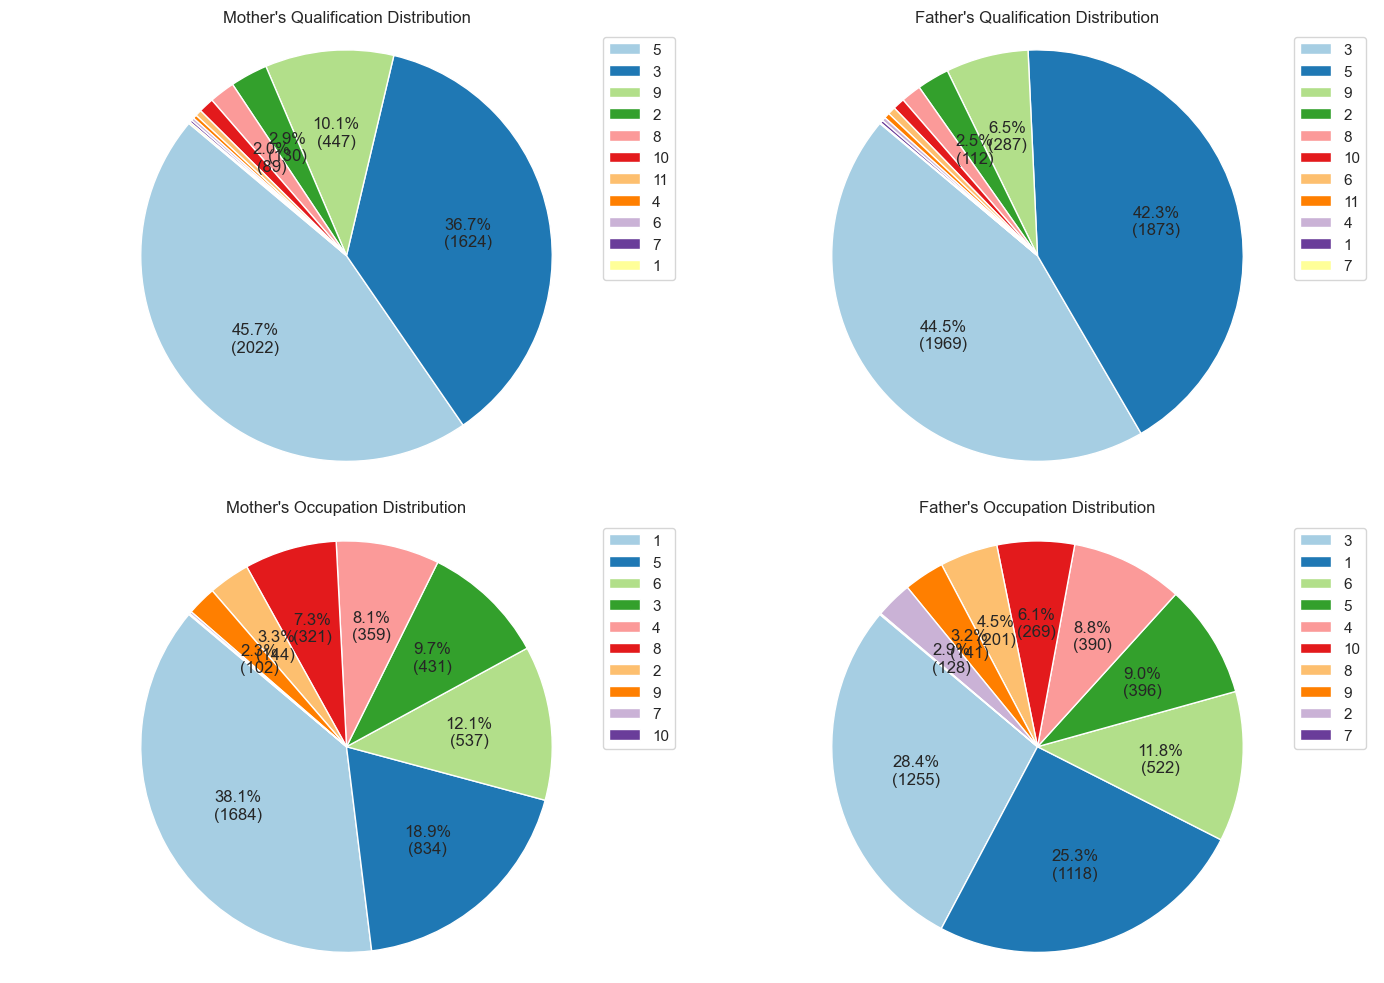

In [24]:
sns.set_theme(style="whitegrid")

# define function to plot pie chart
def plot_pie_chart(ax, data, column, title):
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({val:d})' if pct > 2 else ''  # only show if pct > 2
        return my_format

    ax.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=sns.color_palette('Paired'))
    ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)
    ax.legend(labels=labels, loc='best')

# create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# plot four pie charts
plot_pie_chart(axs[0, 0], df_background, 'Mother\'s qualification', 'Mother\'s Qualification Distribution')
plot_pie_chart(axs[0, 1], df_background, 'Father\'s qualification', 'Father\'s Qualification Distribution')
plot_pie_chart(axs[1, 0], df_background, 'Mother\'s occupation', 'Mother\'s Occupation Distribution')
plot_pie_chart(axs[1, 1], df_background, 'Father\'s occupation', 'Father\'s Occupation Distribution')

plt.tight_layout()
plt.show()

🔖 Overall analysis:
* **Qualification**: Level 3 and 5 dominate both mother's and father's qualification distributions with over 80%. However, there are more mothers with level 5 qualification than fathers with level 5 qualification. This is also the case at level 9 which rank third in both mother's and father's distribution, indicating that mothers are generally more educated than fathers. However, the overall qualification level is medium.

* **Occupation**: Level 1 dominate mother's occupation with 38.1% and level 3 dominate father's occupation with 28.4%. However, the proportion of mothers is bigger than fathers at higher levels of employment such as level 5, level 6, level 8. But the percentage of father's occupation at level 9 and 10 is greater than mothers. The overall occupation level is relatively low.

C:\Users\admin\AppData\Local\Temp\ipykernel_21452\3353087808.py:18: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=factor, y='count', hue='Target', data=plot_data[factor], ax=axs[i], palette=colors)
C:\Users\admin\AppData\Local\Temp\ipykernel_21452\3353087808.py:18: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=factor, y='count', hue='Target', data=plot_data[factor], ax=axs[i], palette=colors)
C:\Users\admin\AppData\Local\Temp\ipykernel_21452\3353087808.py:18: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=factor, y='count', hue='Target', data=plot_data[factor], ax=axs[i], palette=colors)
C:\Users\admin\AppData\Local\Temp\ipykernel_21452\3353087808.py:18: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=factor, y='count', hue='Target', dat

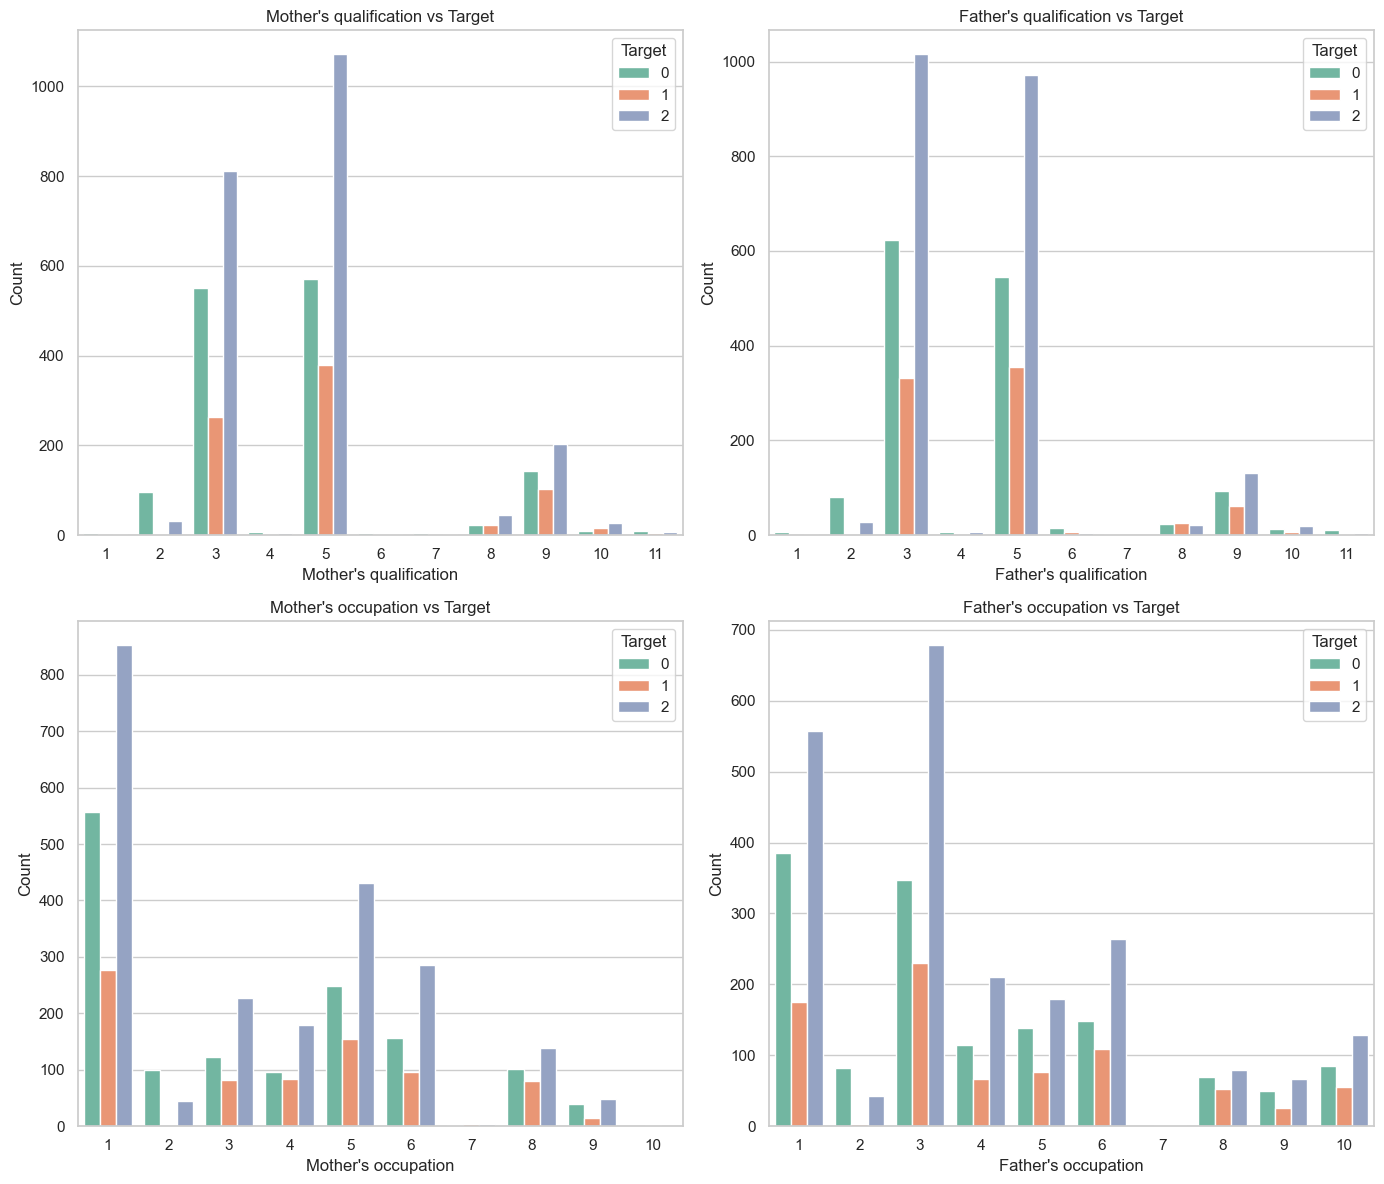

In [25]:
# visualize the distribution of the target variable in each factor

# group the data by factors and target variable
factors = ['Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation']
plot_data = {}
for factor in factors:
    plot_data[factor] = df_background.groupby([factor, 'Target']).size().reset_index(name='count')

# plot the bar chart
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# flatten the axes array for easy iteration
axs = axs.flatten()

colors = sns.color_palette("Set2")

for i, factor in enumerate(factors):
    sns.barplot(x=factor, y='count', hue='Target', data=plot_data[factor], ax=axs[i], palette=colors)
    axs[i].set_title(f'{factor} vs Target')
    axs[i].set_xlabel(factor)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

We use Pearson correlation coefficient to measure the relationship between these factors and target again.

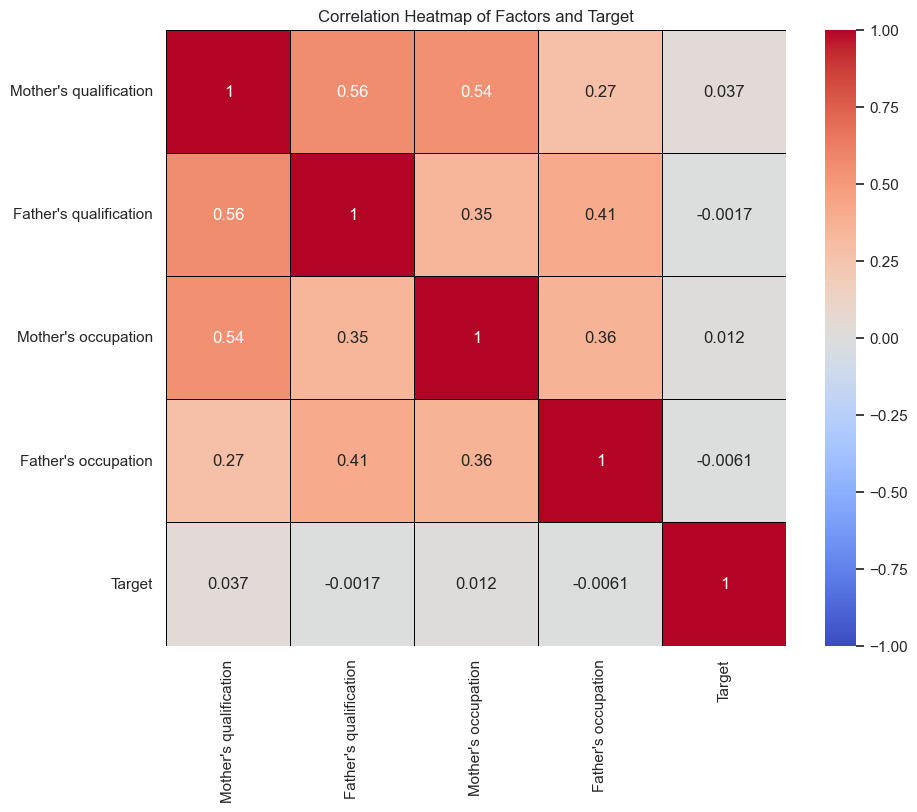

In [26]:
# compute the correlation matrix
corr_matrix = df_background.corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Factors and Target')
plt.show()

It seems that slight relationship between these factors and target. However, Pearson correlation coefficient is not a good measure of association for categorical variables although we qualify four features into consecutive integers. We can use Chi-square test instead.

In [27]:
# perform chi-square tests
def chi_square_test(df, column):
    contingency_table = pd.crosstab(df[column], df['Target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

for factor in factors:
    chi2, p = chi_square_test(df_background, factor)
    print(f'Chi-square test for {factor}: chi2 = {chi2}, p = {p}')

Chi-square test for Mother's qualification: chi2 = 162.13662206689054, p = 2.902379378745331e-24
Chi-square test for Father's qualification: chi2 = 147.20440887885098, p = 2.1525947411005527e-21
Chi-square test for Mother's occupation: chi2 = 132.99629881002159, p = 1.4186230764372643e-19
Chi-square test for Father's occupation: chi2 = 109.92444935536021, p = 3.251012360979974e-15


🔖 By using the Chi-square test, we find that four factors have strong association with the target variable. All p-values are significantly lower than 0.05, indicating that the association is unlikely to be due to random chance. In conclusion, the results imply that **parental qualifications and occupations are important factors influencing the student's graduation status**.

##### (2) macro-economic factors
Three factors are considered in this part:
* Unemployment rate
* Inflation rate
* GDP

In [28]:
# select the relevant columns
df_macro = df[['Unemployment rate', 'Inflation rate', 'GDP', 'Target']]
df_macro

,Unemployment rate,Inflation rate,GDP,Target
0,10.8,1.4,1.74,0
1,13.9,-0.3,0.79,2
2,10.8,1.4,1.74,0
3,9.4,-0.8,-3.12,2
4,13.9,-0.3,0.79,2
...,...,...,...,...
4419,15.5,2.8,-4.06,2
4420,11.1,0.6,2.02,0
4421,13.9,-0.3,0.79,0
4422,9.4,-0.8,-3.12,2


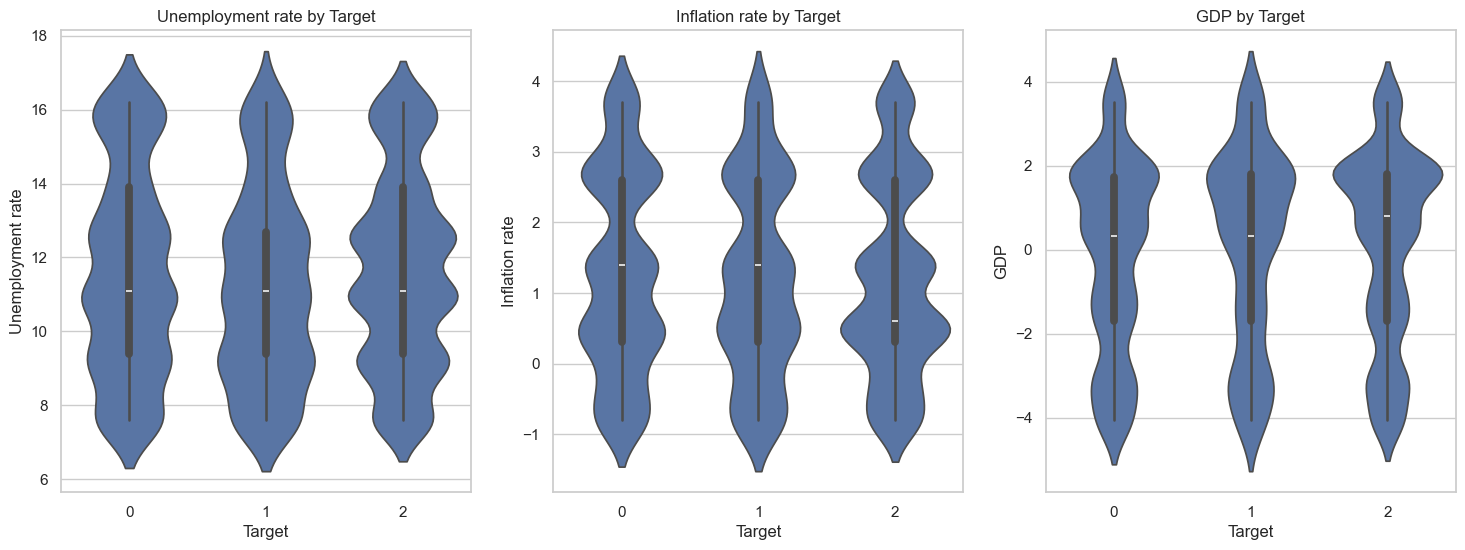

In [29]:
# violin plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(x='Target', y='Unemployment rate', data=df_macro, ax=axs[0])
axs[0].set_title('Unemployment rate by Target')

sns.violinplot(x='Target', y='Inflation rate', data=df_macro, ax=axs[1])
axs[1].set_title('Inflation rate by Target')

sns.violinplot(x='Target', y='GDP', data=df_macro, ax=axs[2])
axs[2].set_title('GDP by Target')

plt.show()

From the violin plot, we find different target have similiar distribution on the same factor. So it is difficult for us to get some information in the violin plot. Although these three factors are less related to the targets based on Pearson correlation, we can't say that they are not important. There might be some hidden patterns or non-linear relationship between these factors and the targets. Let's explore it.

In [30]:
# calculate Spearman correlation coefficient
spearman_corr_unemployment, _ = spearmanr(df_macro['Unemployment rate'], df_macro['Target'])
spearman_corr_inflation, _ = spearmanr(df_macro['Inflation rate'], df_macro['Target'])
spearman_corr_gdp, _ = spearmanr(df_macro['GDP'], df_macro['Target'])

print(f"Spearman correlation (Unemployment rate): {spearman_corr_unemployment}")
print(f"Spearman correlation (Inflation rate): {spearman_corr_inflation}")
print(f"Spearman correlation (GDP): {spearman_corr_gdp}")

Spearman correlation (Unemployment rate): 0.01637767229040815
Spearman correlation (Inflation rate): -0.02225868669711891
Spearman correlation (GDP): 0.05349661502501174


🔖 All three values are very low, indicating that both linear and nonlinear relationship is weak. It seems that the macro-economic factors have slight impact on the student's graduation status.